https://www.kaggle.com/ash316/eda-to-prediction-dietanic    
DieTanic을 보고 필사한 노트북입니다.

##### 노트북 목차
**Part1: Exploratory Data Analysis(EDA)**
1) Analysis of the features(특징 분석)    
2) Finding any relations or trends considering multiple features. (여러 특징의 관계 또는 추이 발견)
     
**Part2: Feature Engineering and Data Cleaning**
1) Adding any few features.(새로운 특징 추가)    
2) Removing redundant features.(불필요한 특징 제거)     
3) Converting features into suitable form for modeling.(모델링에 맞는 특징으로 변환)  
    
**Part3: Predictive Modeling**    
1) Running Basic Algorithms    
2) Cross Validation     
3) Ensembling     
4) Important Features Extraction(중요 특징 추출)     

# Part1: Exploratory Data Analysis(EDA)

In [104]:
# module load
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [105]:
data=pd.read_csv('../input/train.csv')

In [106]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
# check null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked에 null값이 존재한다.

### How many Survived?

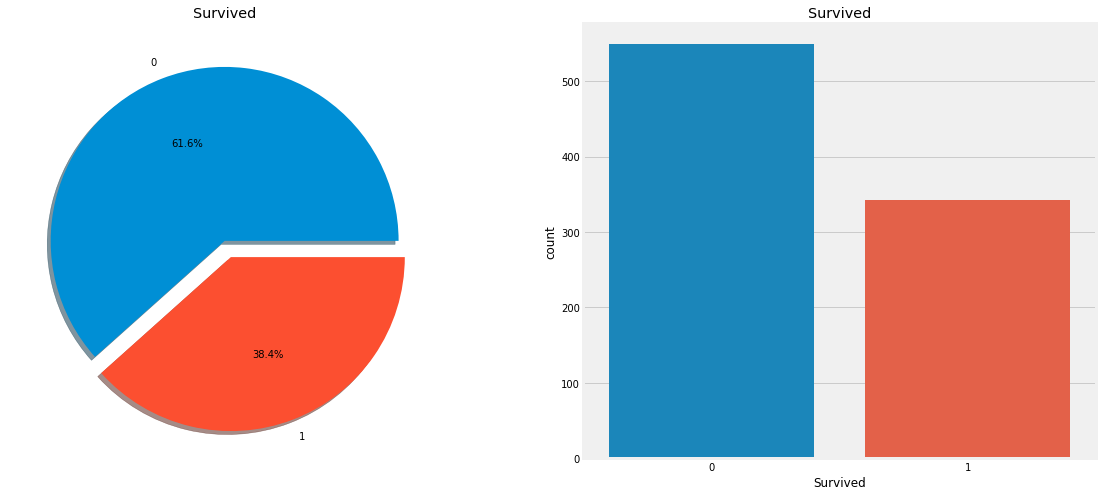

In [108]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

training set에 891명의 승객이 있었는데 약 350명(**38.4%**)만 살아남았다.    
우리는 데이터로부터 더 나은 인사이트를 얻고, 생존자와 사망자 카테고리를 더 자세히 보자.    

우리는 데이터셋의 다른 특징을 사용해 생존자 비율을 체크하려고 한다. (특징 : Sex, Port Of Embarcation, Age, etc)

먼저 특징의 다른 타입에 대해서 이해하고 넘어가자.

### Types of Features
* Categorical Features:    
    두개 이상의 범주가 있는 변수. 예를 들어, 성별의 경우 두개의 범주를 갖는 범주형 변수이다.(남,여)    
    범주형 변수는 정력할 수 없기 때문에 **명목변수**라고도 한다.    
    **이 데이터셋에 있는 Categorical Features: Sex, Embarked**
* Ordinal Features: (순서형 변수)
    범주형 변수와 유사하지만 차이점은 값 사이에 상대적인 순서를 지정하거나 정렬할 수 있다는 것이다.     
    예를 들어, tall, medium, short라는 값을 가진 높이라면 높이는 ordinal variable이다.    
    우리는 값을 상대적으로 정렬시킬수 있다.    
    **이 데이터셋에서는 PClass**
* Continous Features: (연속형 변수)    
    두 점 또는 최소값과 최대값 사이에 값을 가지고 올 수 있는 값.    
    **이 데이터셋에서는 Age**

### Analysing The Features

#### Sex(Categorical Feature)

In [109]:
data.groupby(['Sex', 'Survived'])['Survived'].count().to_frame()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

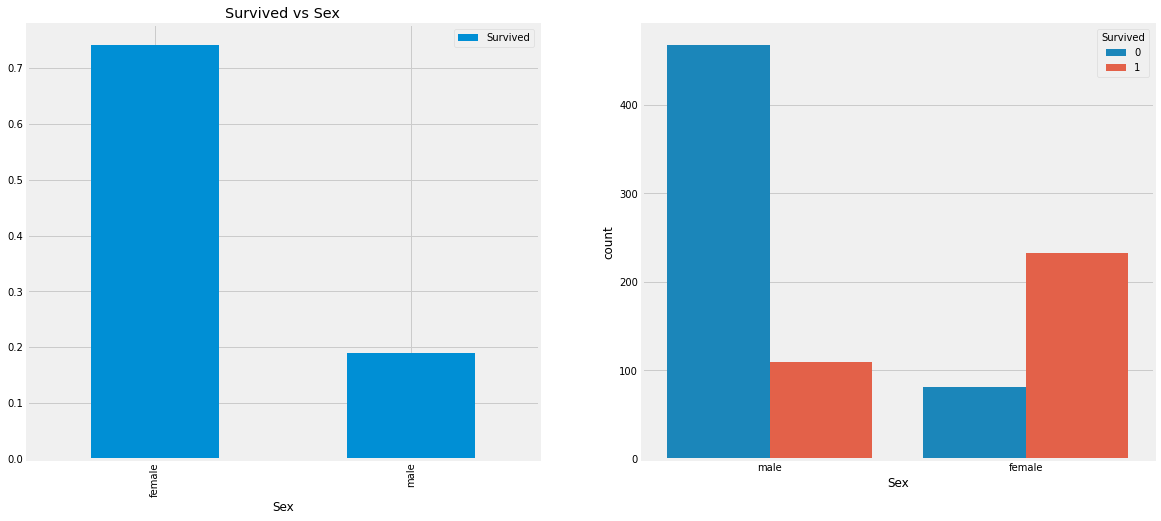

In [110]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived', data=data, ax=ax[1])
plt.show()

###### 알 수 있는 것
* 배에 타고 있는 남자들의 수가 여자들의 수보다 훨씬 많다.
* 하지만 생존률은 여성이 훨씬 높다.(여성: 75%, 남성:18%~19%)

#### PClass(Ordinal Feature)

In [111]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


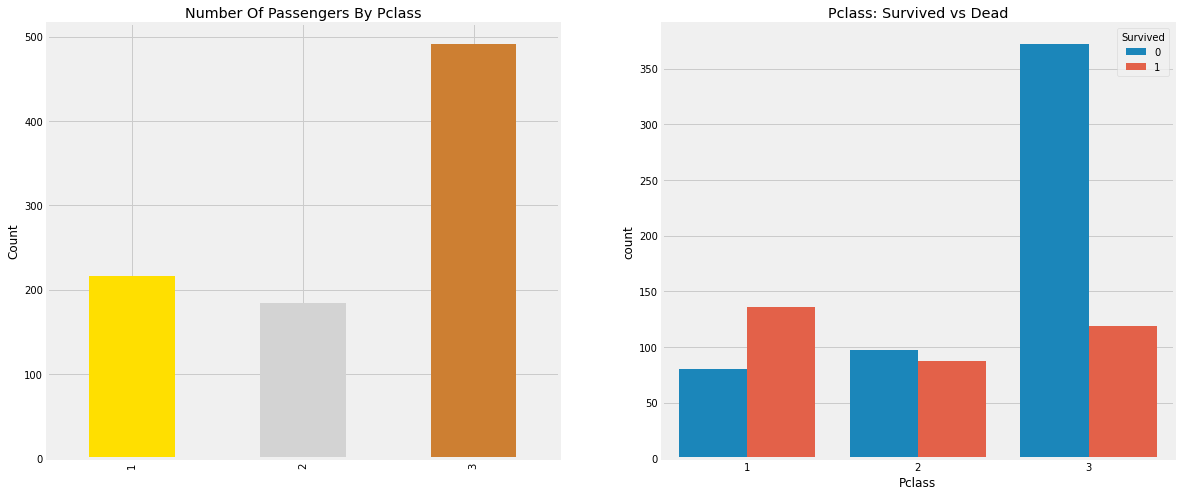

In [112]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

###### 알 수 있는 것
* 3 class 승객이 제일 많다.
* 사망률도 3 class가 제일 높다.
* Pclass 1: 63%, Pclass 2: 48%, Pclass 3: 25% 의 생존율을 보이고 있다.

Sex와 P class를 함께 사용해 생존율을 확인해보자.

In [113]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

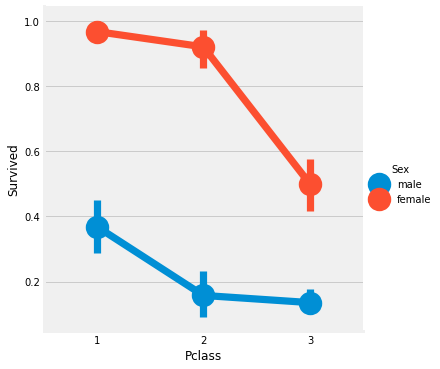

In [114]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

factorplot을 이용하면 범주형 값의 분리가 쉽기 때문에 사용했다.

###### 알 수 있는 것
* Pclass에 상관없이 여성이 우선적으로 구조되었다.
* Pclass 1의 남성도 생존율이 낮다.

#### Age(Continous Feature)

In [115]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


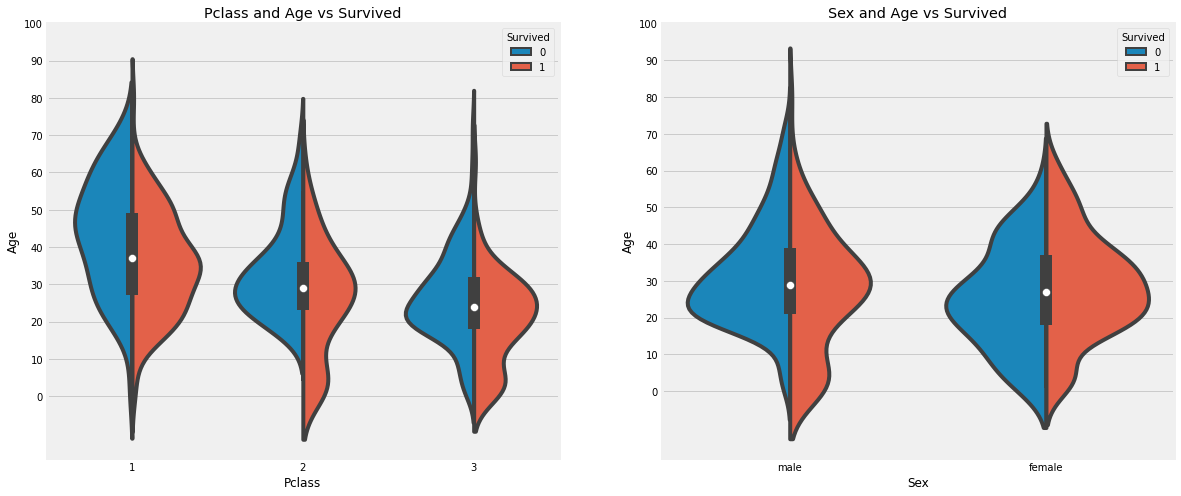

In [116]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass', 'Age',hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age',hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

###### 알 수 있는 것
* 어린이의 수는 P class 따라 증가하고, 10세 미만 승객의 생존율은 Pclass와 상관없이 양호하다.
* Pclass 1의 경우 20~50세 사이 생존율이 높고, 여성의 경우도 높다.
* 남성의 경우 나이가 증가하면 생존율이 떨어진다.

앞에서 null check를 했을 때 age에 177개의 null값이 있었다.    
null 값을 대체하기 위해 데이터 셋의 평균 나이를 사용할 수 있다.    
하지만 나이의 범위가 너무 넓은 것이 문제이다. 승객이 어느 나이대에 거짓말을 하는지 알 수 있을까??    
    
이름을 사용할 수 있다. 이름 데이터를 살펴보면 Mr/Mrs같은 접두어를 살펴볼 수 있다. 따라서 Mr와 Mrs의 평균 값을 각 그룹에 할당할 수 있다.

In [117]:
data['Initial'] = 0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

'문자열.'형태의 문자열을 추출함으로써 Mr., Miss. 등을 추출했다.

In [118]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


오탈자나 다른 값들을 같은 의미를 가진 값으로 대체한다.

In [119]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [120]:
data.groupby('Initial')['Age'].mean().to_frame()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


#### Filling NaN Ages

In [121]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [122]:
data.Age.isnull().any() # any() : NaN값이 하나라도 있음 True, 없으면 False를 반환

False

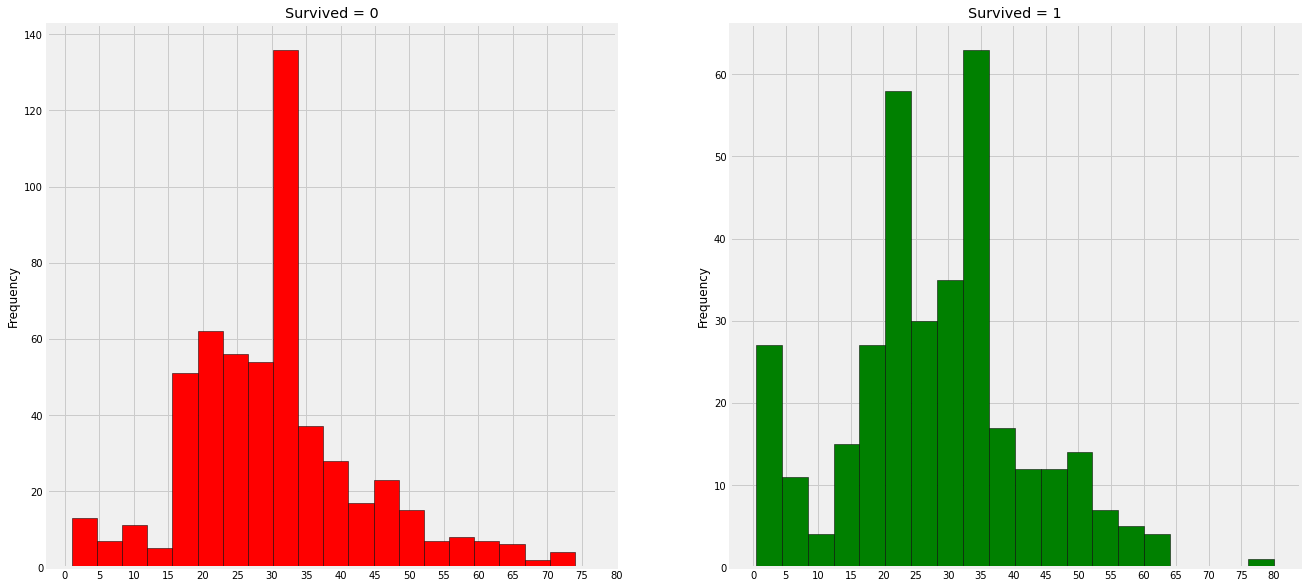

In [123]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, color='red', edgecolor='black')
ax[0].set_title('Survived = 0')
ax[0].set_xticks(list(range(0,85,5)))
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='black')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(list(range(0,85,5)))
plt.show()

###### 알 수 있는 것
* 5살 이하의 생존율이 높다.
* 30~40 사이 사망율이 최대값이다.
* 가장 나이가 많은 생존자는 80대이다.

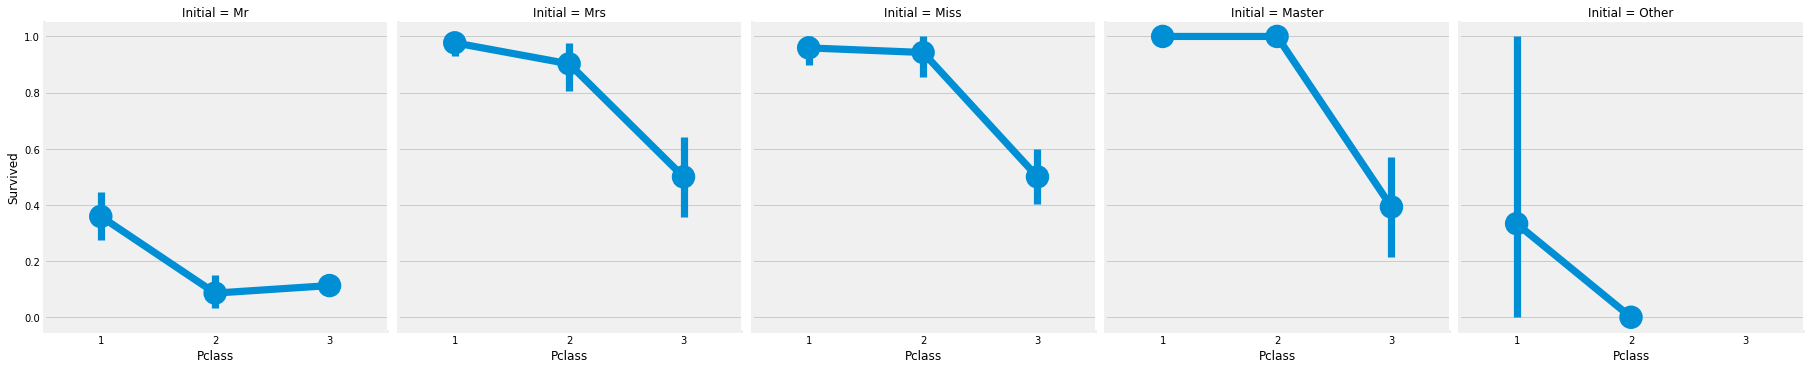

In [124]:
sns.factorplot('Pclass', 'Survived',col='Initial',data=data)
plt.show()

###### 알 수 있는 것
* 여성과 어린이 우선 정책은 계급에 상관이 없다.

#### Embarked(Categorical Value) -> 승선항
![image](https://user-images.githubusercontent.com/63278762/128984619-1590c328-f200-4999-b2ee-06918e11fe0b.png)

In [125]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

**Embarked**    
* C : Cherbourg
* Q : Queenstown
* S : Southampton

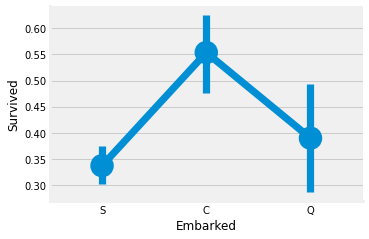

In [126]:
# Embarked에 따른 생존률
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

생존율이 가장 높은 항구는 C (약 0.55)이고, 가장 낮은 항구는 S (약 0.35)이다.

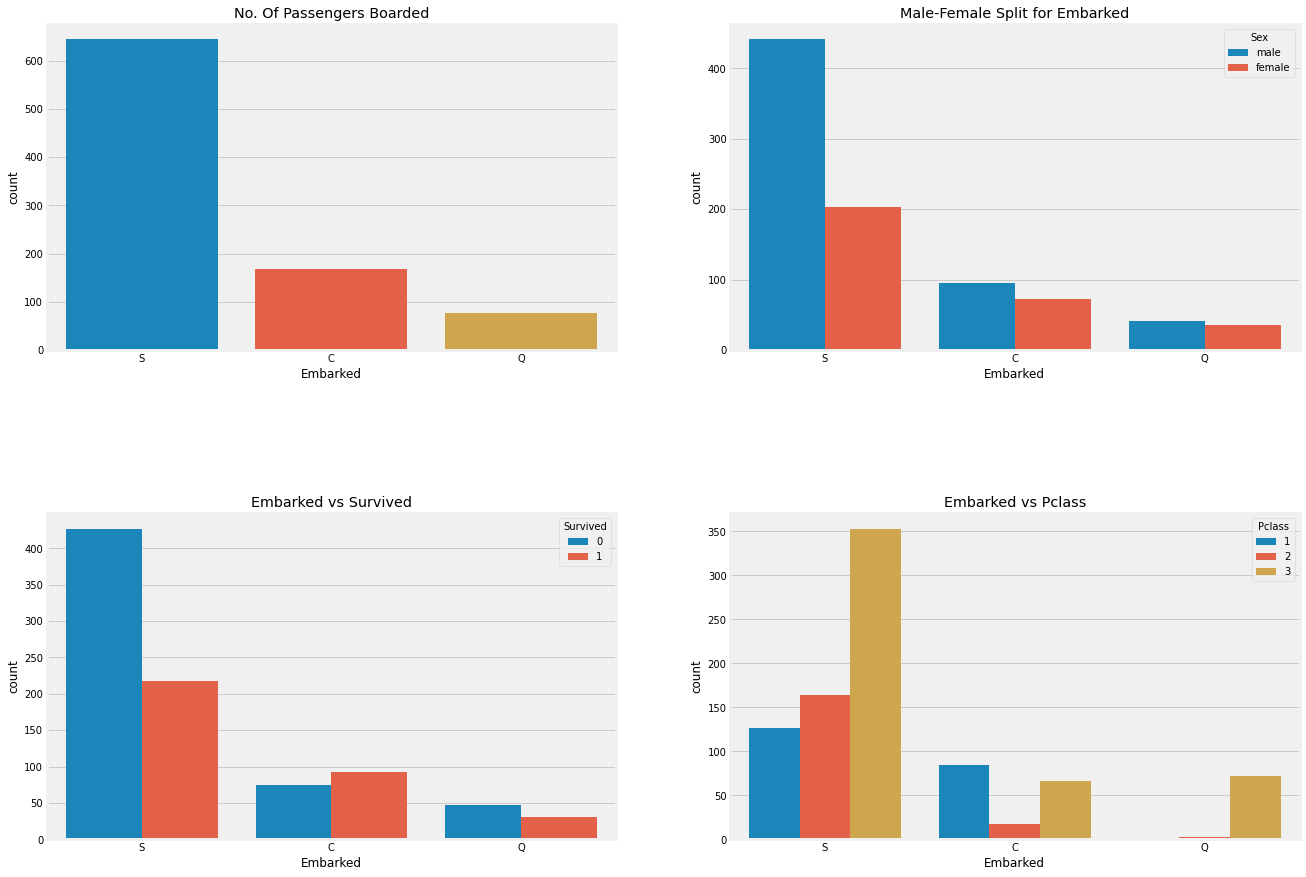

In [127]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

###### 알 수 있는 것
* S 탑승객이 제일 많고, 주요 탑승 Pclass는 3이다.
* C에서 온 승객의 생존율이 사망율보다 높다. 그 이유는 Pclass 1, Pclass2 승객을 모두 구조한것이라 유추할 수 있다.
* S 의 Pclass 1, 2 탑승객이 많은 것을 알 수 있다. Pclass 3의 탑승객도 많고, Pclass 3은 생존율이 낮기 때문에 전체 생존율은 낮다.
* Q 탑승객은 95%가 Pclass 3이다.

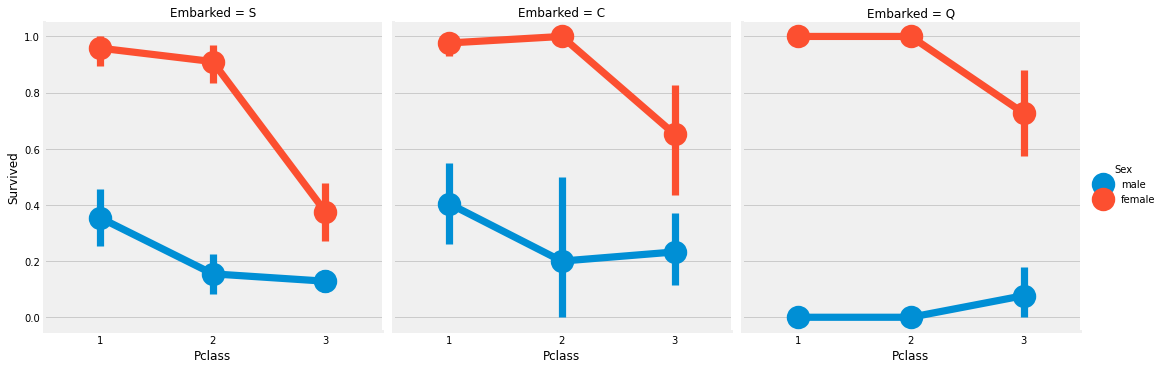

In [128]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

###### 알 수 있는 것
* Pclass 1, 2 여성의 생존율은 거의 1이다.
* S 탑승객의 경우 Pclass 3의 여성과 남성 모두 생존율이 낮다.
* Q 탑승객의 경우 거의 Pclass 3이기에 남성의 생존율이 낮아보인다.

#### Filling Embarked NaN

S항구의 탑승객이 제일 많아보이기에 NaN을 S로 대체한다.

In [129]:
data['Embarked'].fillna('S', inplace=True)

In [130]:
data.Embarked.isnull().any()

False

#### SibSip(Discrete Feature)  -> 가족관계
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

In [131]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


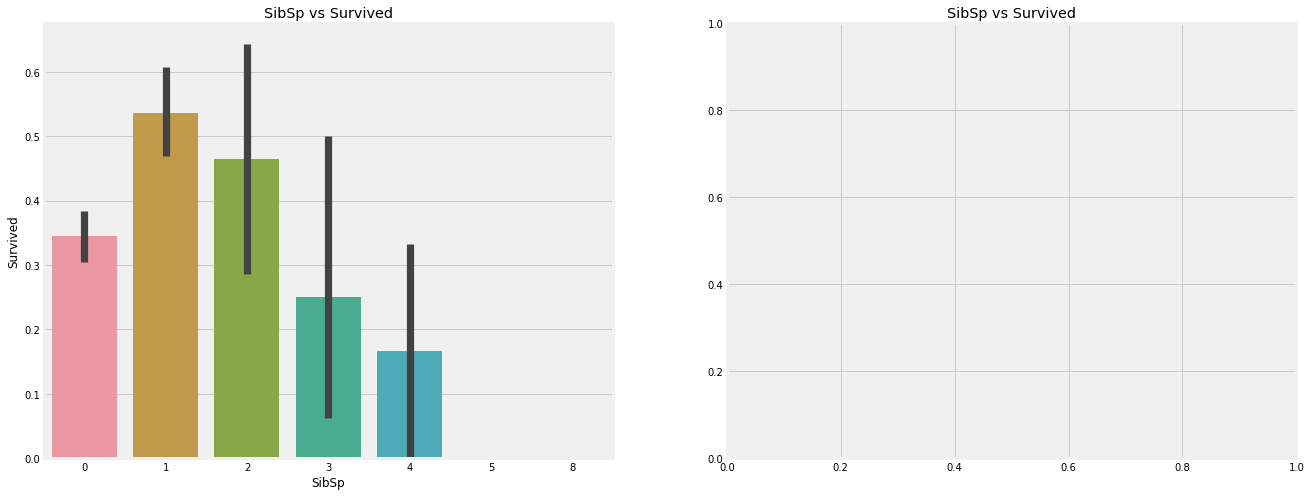

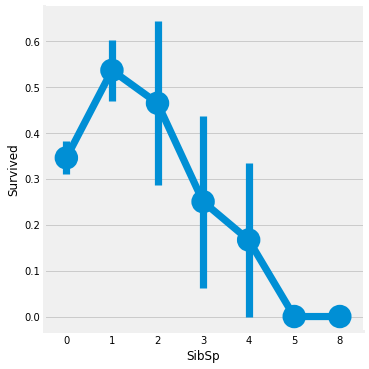

In [132]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

In [133]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


###### 알 수 있는 것
* sibling이 없는 경우 34.5%의 생존율을 보인다.
* sibling이 늘어날수록 생존율이 떨어진다.
* sibling이 5~8명인 탑승객의 생존율은 0%이다.
* sibling >3 인 탑승객은 모두 Pclass 3에 있다.

#### parch  -> 가족관계

* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson    
Some children travelled only with a nanny, therefore parch=0 for them.    
(일부 아이들은 유모와 여행을 다녔기 때문에 parch=0이다.)

In [134]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


대가족은 Pclass 3에 있다고 다시 한번 보여주고 있다.

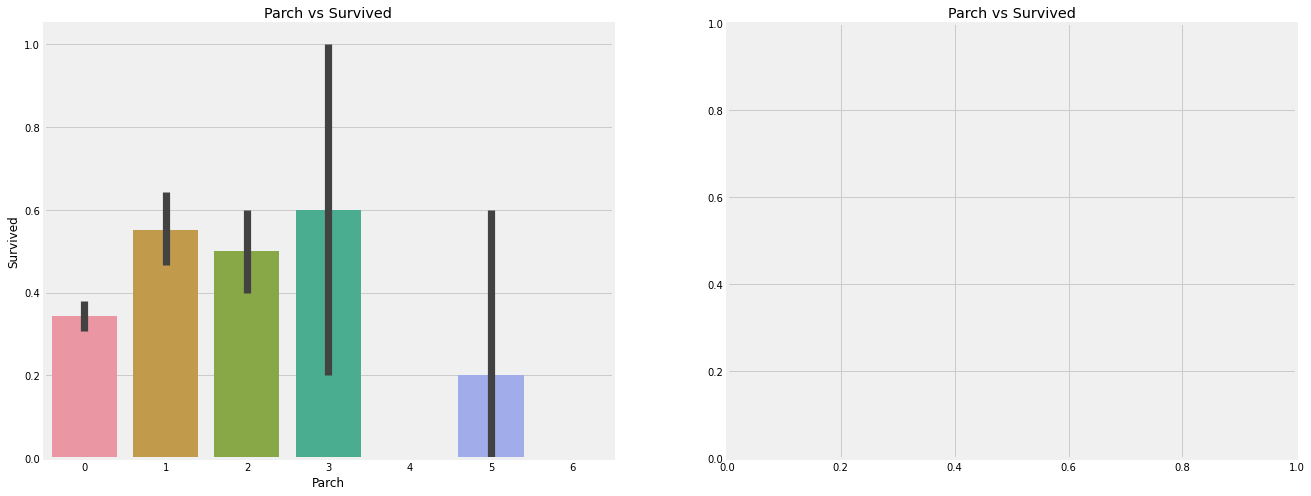

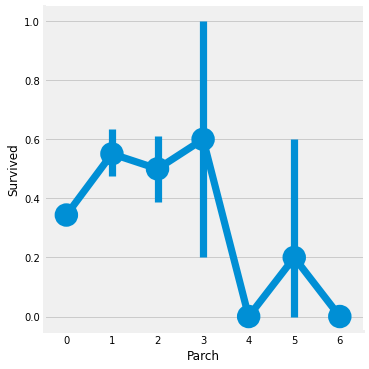

In [135]:
f, ax=plt.subplots(1,2, figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

###### 알 수 있는 것
* 부모와 함께 탄 승객은 생존율이 높지만, 숫자가 늘어날수록 생존율이 떨어진다.
* 1~3명과 함께 탄 승객들의 생존율이 높다.

#### Fare(Continous Feature)

In [136]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


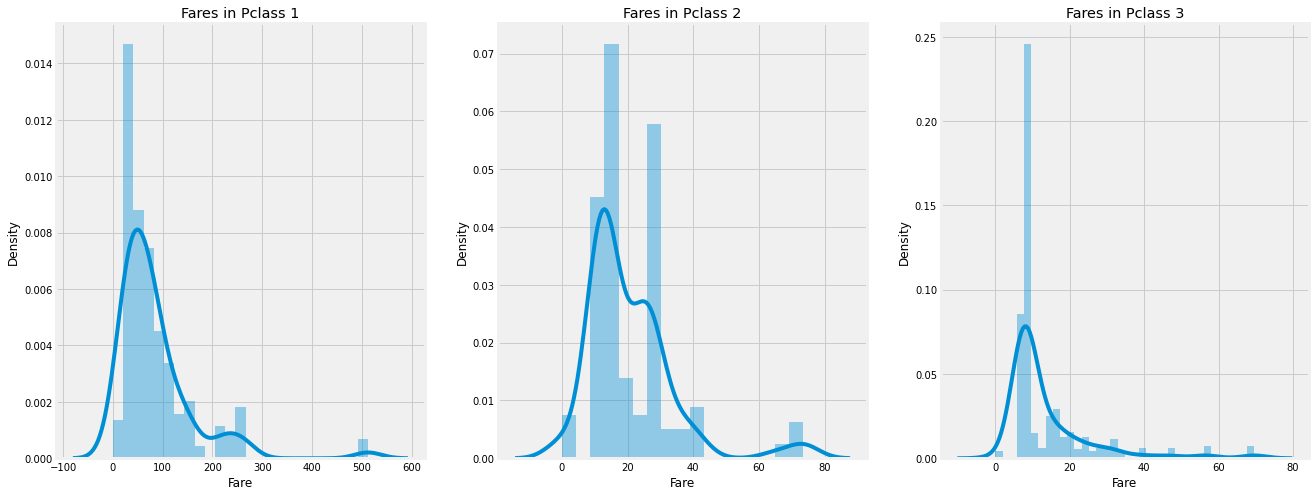

In [137]:
f, ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

fare가 증가하면서 분포가 줄어들고있다.

### Observations in a Nutshell for all features
* Sex: 여성이 남성과 비교해서 생존율이 높다.
* Pclass: 1st Class 탑승객이 생존율이 가장 높고 3rd Class 탑승객의 생존율이 가장 낮다. 여성의 경우 Pclass 1에서 생존 확률은 거의 1이고, Pclass 2에서도 생존 확률이 높다.
* Age: 5\~10세 어린이는 생존율이 높고, 15\~35세 탑승객의 생존율은 낮다.
* Embarked: Pclass 1이 많은 C의 경우 Pclass 3이 대다수인 Q보다 생존율이 높다.
* Parch+SibSp: 형제/자매 1\~2명과 같이 탑승했거나, 1\~3의 부모와 탑승한 사람들의 생존률이 혼자 탑승하거나 대가족으로 탑승한 사람들보다 높다.

### Correlation Between The Features

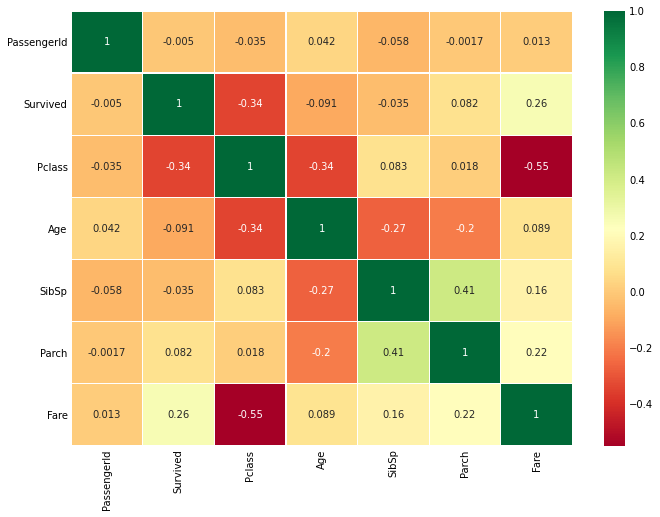

In [138]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

###### Heatmap의 해석
* 양성 상관관계 : 특성 A가 증가하면 특성 B가 증가하는 것. 1일때 완벽한 양의 상관 관계를 의미
* 음성 상관관계 : 특성 A가 감소하면 특성 B가 감소하는 것. -1일때 완벽한 음의 상관 관계를 의미


###### 알 수 있는 것
* feature들의 상관관계가 크지 않다.
* 가장 높은 상관관계를 갖는 feature는 Parch와 Sibsp이다.

# Part2: Feature Engineering and Data Cleaning

## Age_band
Age의 경우 continous feature인데 머신러닝 머델에서는 continous variables에 문제가 있다.    
나이별로 묶으려고 할 때 연속형이기에 범주가 없기 때문. 따라서 Binning 또는 Normalization으로 범주형 값으로 변환해야 한다. 여기서는 Binning을 사용한다. 즉, 연령 범위를 단일 bin으로 그룹화하거나 단일 값을 할당한다.

In [139]:
data.Age.describe()

count    891.000000
mean      29.841942
std       13.281525
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

최대 연령은 80세이다. 그러면 0~80까지 5개의 범주로 나눈다.

In [140]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [141]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


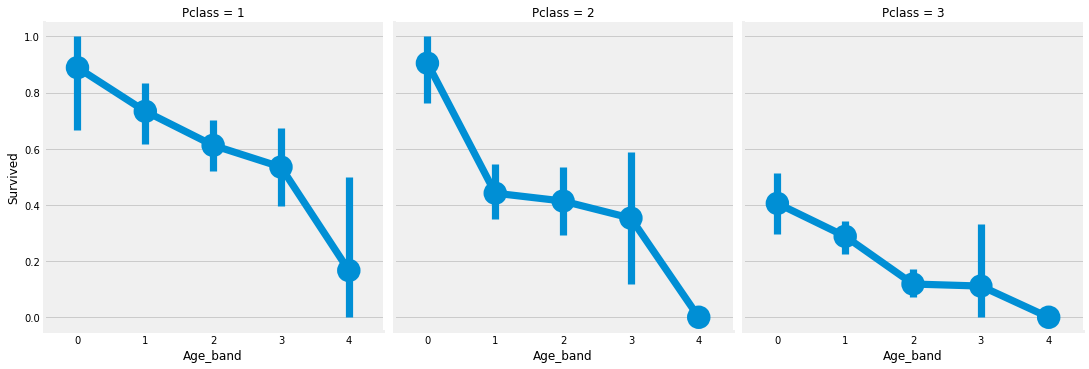

In [142]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

P class 상관없이 나이가 많아지면 생존율이 감소한다.

## Family_Size and Alone
* Family_Size = Parch와 SibSp를 합쳐서 가족의 규모를 가지는 feature
* Alone = 승객이 혼자인지 아닌지를 나타내는 feature

In [143]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
data['Alone'] = 0

data.loc[data.Family_Size ==0, 'Alone'] = 1

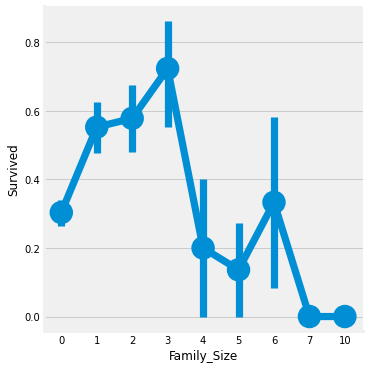

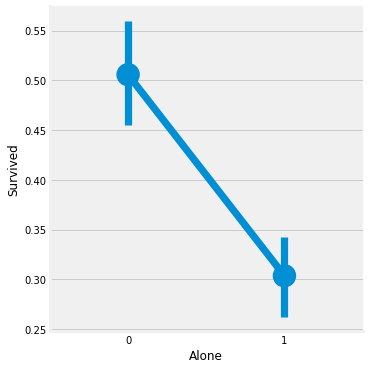

In [144]:
f, ax=plt.subplots(1,2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(1)
plt.show()

* family_size=0(alone)일때 생존율이 낮고, 또 family_size >=4 일때 생존율이 감소한다.

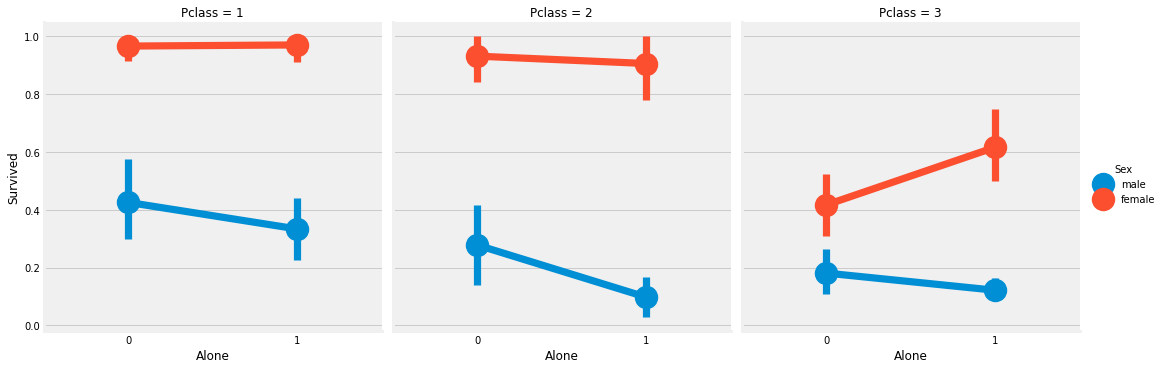

In [145]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

P class 3의 여성을 제외하고 혼자 탑승한 것이 클래스와 성별 구분없이 생존율이 낮다.

## Fare_Range
fare도 continous feature이다. 이것을 ordinal value(순서형 범주)로 바꿔야 한다. 여기서는 `pandas.qcut`을 이용할 것이다.

In [146]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


여기서 fare range가 증가하면 생존율이 높아지는 것을 볼 수 있다.    
Age_Band에서 했던 것처럼 값을 변환해준다.(범주형으로 변환)

In [147]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

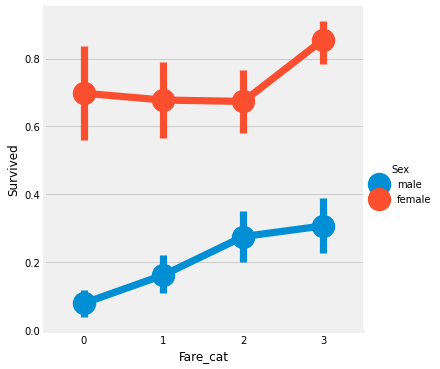

In [148]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

fare_cat이 증가하면 성별 상관없이 생존율이 증가한다.

## Converting String Values into Numeric
문자형 데이터를 머신러닝 모델에 넣지 못하므로 숫자형 데이터로 바꿔준다.

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Initial      891 non-null    object  
 13  Age_band     891 non-null    int64   
 14  Family_Size  891 non-null    int64   
 15  Alone        891 non-null    int64   
 16  Fare_Range   891 non-null    category
 17  Fare_cat     891 non-null    int64   
dtypes: category(1), float64(2), in

In [150]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## Dropping UnNeeded Features
* Name : 범주형 값으로 변환할 수 없기 때문에 필요없다.
* Age : Age_band가 추가되었기에 필요없다.
* Ticket : 랜덤하게 생성된 문자열이기 때문에 필요없다.
* Fare, Fare_Range : Fare_cat을 추가되었기에 필요없다.
* Cabin : 많은 결측치가 있기 때문에 필요없다.
* PassengerId : 탑승객의 고유한 값이기 때문에 필요가 없다.

In [151]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Fare_Range', 'Cabin', 'PassengerId'], axis=1, inplace=True)

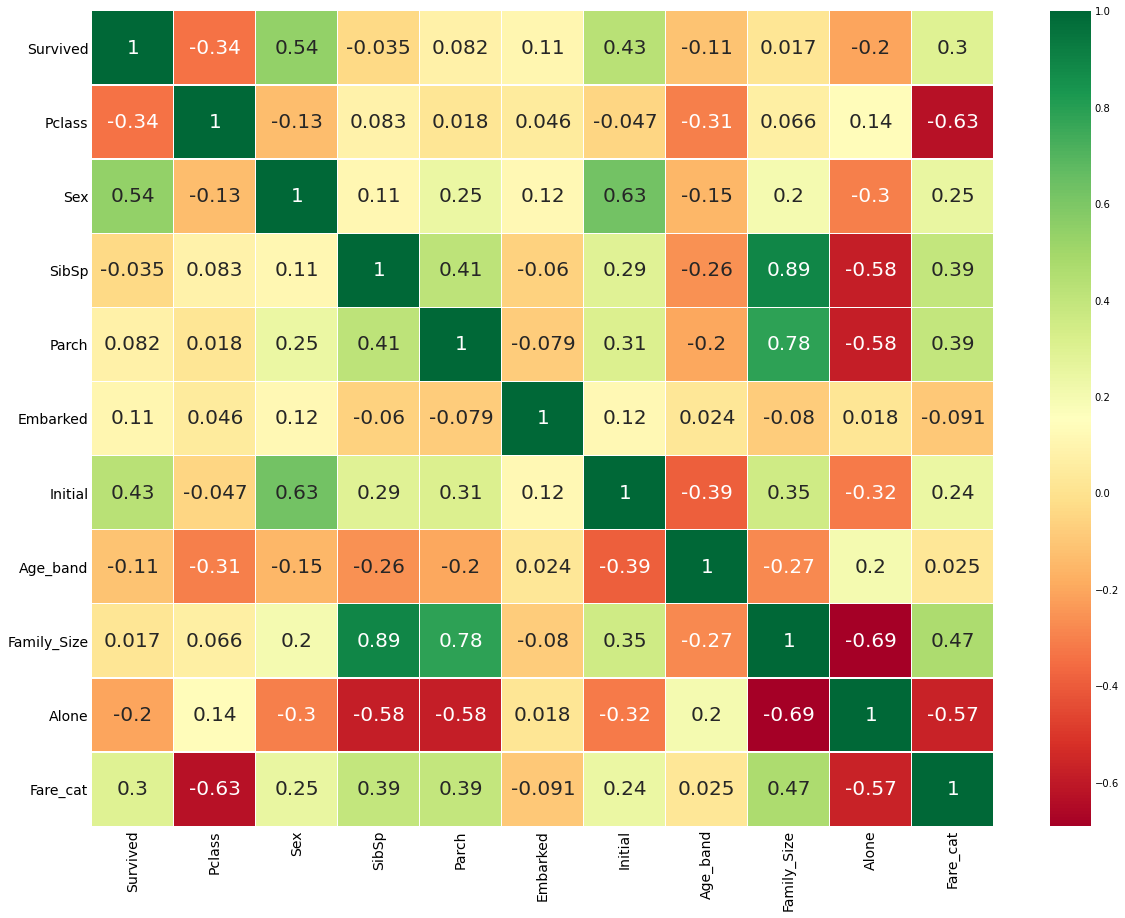

In [152]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* Parch와 Family_size, SibSp와 Family_size는 양의 상관관계를 갖고 있다.
* Alone과 Family_size는 음의 상관관계를 갖고 있다.

# Part3: Predictive Modeling
승객이 살았는지 죽었는지 예측하는 것을 여러 모델을 이용해 해본다.
1. Logistic Regression
2. Support Vector Machines
3. Random Forest
4. K-Nearest Neighbors
5. Navie Bayes
6. Decision Tree
7. Logistic Regression

In [153]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score #for confusion matrix

In [154]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,0,3,0,0,0,0,0,1,0,1,0
836,0,3,0,0,0,0,0,1,0,1,1
639,0,3,0,1,0,0,0,2,1,0,2
389,1,2,1,0,0,1,2,1,0,1,1
597,0,3,0,0,0,0,0,3,0,1,0


* stratify : classification을 다룰 때 중요한 옵션. stratift 값을 target  값으로 지정해주면 class의 비율을 유지시켜준다.

In [155]:
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## Radial Support Vector Machines

In [156]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


## Linear Support VectorMashine

In [157]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


## Logistic Regression

In [158]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


## Decision Tree

In [159]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


## KNN

In [160]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


KNN에서 n_neighbors의 변화에 따른 정확도를 살표보자.

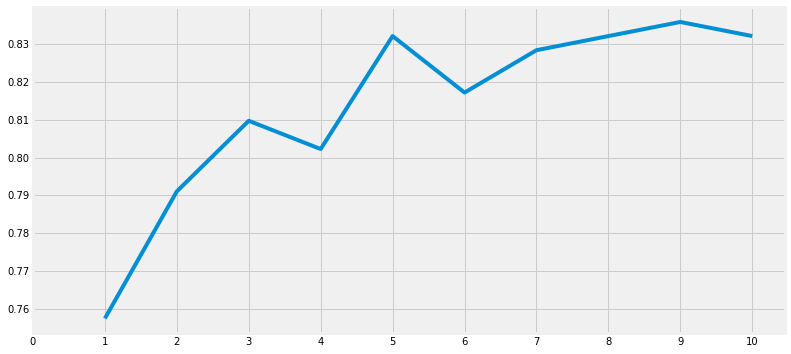

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [161]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## Gaussian Naive Bayes

In [162]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


## Random Forests

In [163]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8059701492537313


train set에 대한 정확도가 90%라고 해서 새로운 테스트 데이터에 대해서도 정확도가 90%가 나오는지는 알 수 없다.    
train set에만 잘 맞는 오버피팅을 막기 위해서 Cross validation을 사용한다.

어떤 모델이 성능이 좋은지 일일히 돌려봤지만, 오버피팅이 날 수도 있다. -> Cross validation으로 해결

## Cross Validation

### K-Fold
1. K-Fold Cross Validation은 데이터 셋을 k-subset으로 나누는 방식이다.
2. 데이터셋을 K(=5)부분으로 나눈다고 가정하면 테스트를 위해 1개 세트를 빼고, 4개 세트에 대해 학습한다.
3. 반복할 때마다 test 범위를 변경한다. 그 다음 정확도와 오차를 평균화해 알고리즘의 평균 정확도를 구한다.    

![image](https://user-images.githubusercontent.com/63278762/129845085-5118b5ed-4446-4b75-945e-7c84c386b08e.png)

In [164]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.807004,0.029273
Naive Bayes,0.801386,0.028999
Random Forest,0.809276,0.036059


<AxesSubplot:>

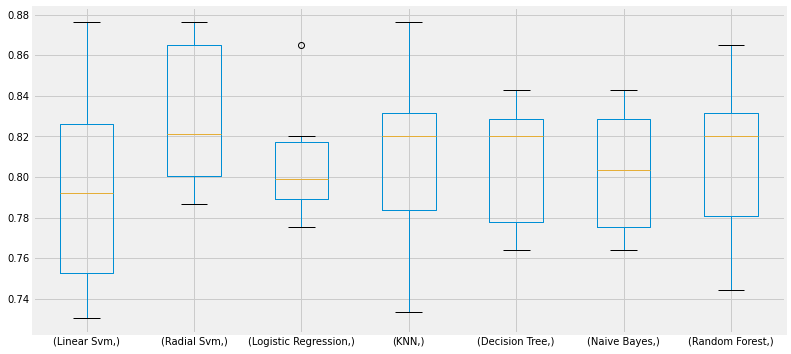

In [165]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

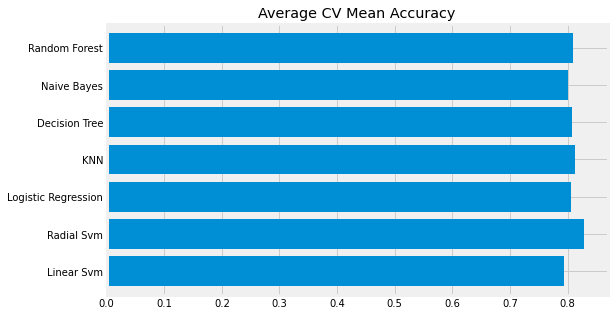

In [166]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix
데이터의 불균형으로 분류 정확도가 잘못될 수 있다. 모델이 어떤 클래스를 잘못 예측했는지 보기 위해서 Confusion Matrix를 사용한다.

In [167]:
reports={}

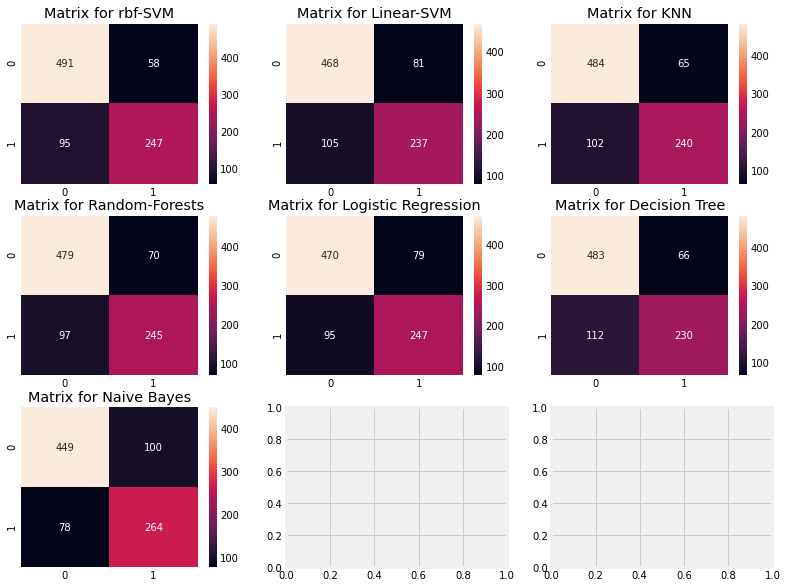

In [168]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
reports['rbf-SVM'] = accuracy_score(Y, y_pred)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
reports['Linear-SVM'] = accuracy_score(Y, y_pred)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
reports['KNN'] = accuracy_score(Y, y_pred)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
reports['Random-Forests'] = accuracy_score(Y, y_pred)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
reports['Logistic'] = accuracy_score(Y, y_pred)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
reports['Decision'] = accuracy_score(Y, y_pred)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
reports['Naive Bayes'] = accuracy_score(Y, y_pred)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [169]:
accuracy_df = pd.DataFrame({'name':reports.keys(), 'accuracy':reports.values()})
accuracy_df.sort_values(by='accuracy', ascending=False).reset_index(drop=True)

,name,accuracy
0,rbf-SVM,0.828283
1,KNN,0.812570
2,Random-Forests,0.812570
3,Logistic,0.804714
4,Decision,0.800224
5,Naive Bayes,0.800224
6,Linear-SVM,0.791246


![image](https://user-images.githubusercontent.com/63278762/129828182-aca6eae2-3151-4dea-8df9-faf0c2b7aab5.png)

#### rbf-SVM을 예를 들면
1. 올바른 예측 수는 491+247이고, 평균 cv 정확도는 (491+247)/891 = 82.8%이다.
2. 사망->생존, 생존->사망 으로 잘못 예측한 사람은 총 (58+95)

rbf-SVM은 사망자의 예측을 정확히 하는 편이고, Naive Bayes는 생존자 확률  정확도가 높은 편이다.

## Hyper-Parameters Tuning
모델에는 기본 파라미터가 있는데, 이것을 변경하거나 조정하면서 더 나은 성능의 모델을 찾는 것이다.

### SVM

In [170]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True) # default: rdf
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   24.1s finished


### Random Forests

In [171]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   41.5s finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


* SVM은 C=0.4, gamma=0.3이 정확도 82.82%로 가장 높다.
* RandomForest에서는 n_estimator=300일때 81%로 가장 높다.

## Ensembling
모델의 정확성이나 성능을 높이는 방법. 다양한 단순 모델들을 조합해 강력한 모델을 만드는 것이다.    

1. Voting Classifier
2. Bagging
3. Boosting

### 1. Voting Classifier
모든 하위 모델의 예측에 기초한 평균 예측 결과를 제공한다.

In [172]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8237952559300874


### 2. Bagging
분산을 줄이고 과적합을 피하게 해준다. Decision Tree나 Random Forest에만 적용되는게 일반적이나, 그 외 다른 방법들과 함께 사용할 수 있다. Bagging은 분산이 큰 모델에 효과적이다. 

#### Bagged KNN
KNN은 작은 값 n_neighbors를 사용한다.

In [173]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


In [174]:
model.estimators_

[KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsC

#### Bagged DecisionTree

In [175]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


In [176]:
model.estimators_

[DecisionTreeClassifier(random_state=2087557356),
 DecisionTreeClassifier(random_state=132990059),
 DecisionTreeClassifier(random_state=1109697837),
 DecisionTreeClassifier(random_state=123230084),
 DecisionTreeClassifier(random_state=633163265),
 DecisionTreeClassifier(random_state=998640145),
 DecisionTreeClassifier(random_state=1452413565),
 DecisionTreeClassifier(random_state=2006313316),
 DecisionTreeClassifier(random_state=45050103),
 DecisionTreeClassifier(random_state=395371042),
 DecisionTreeClassifier(random_state=1587149235),
 DecisionTreeClassifier(random_state=191269509),
 DecisionTreeClassifier(random_state=237186348),
 DecisionTreeClassifier(random_state=1668685308),
 DecisionTreeClassifier(random_state=620267411),
 DecisionTreeClassifier(random_state=439259671),
 DecisionTreeClassifier(random_state=2140390242),
 DecisionTreeClassifier(random_state=963653404),
 DecisionTreeClassifier(random_state=1309320516),
 DecisionTreeClassifier(random_state=2137312669),
 DecisionTre

### 3. Boosting

순차 학습의 classifier을 사용하는 앙상블 기법.    
학습을 진행하면서 올바르게 예측 된 것이 있고 아닌게 있다. iterator가 돌면서 이 잘못된 인스턴스를 올바르게 예측하려고 한다. 이제 이 반복 프로세스가 계속되며 정확도에 대한 한계에 도달할 때까지 모델에 새 분류기가 추가된다.    

#### AdaBoost(Adaptive Boosting)
약한 learner 나 평가자를 가지고 있는 것은 Decsion Tree이다. 하지만 기본 평가자를 우리가 원하는대로 바꿀 수 있다.
base_estimator의 기본 값은 DecisionTreeClassifier

In [177]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting

![image](https://user-images.githubusercontent.com/63278762/129851241-0b2182ac-ecda-4e75-b1c6-ff729e466dce.png)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [74]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

[05:12:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:12:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:12:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:12:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

AdaBoost가 가징 정확도가 높으므로 이것에 대해 Hyper-Parameter Tuning을 진행한다.

#### Hyper-Parameter Tuning for AdaBoost

In [75]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 10.8min finished


learning_rate=0.1, n_estimators=100 이 최대 정확도를 가진다.

#### Confusion Matrix for the Best Model

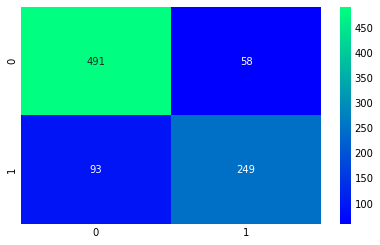

In [76]:
ada=AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.1)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Bagging과 Boosting의 차이
#### Bagging
![image](https://user-images.githubusercontent.com/63278762/129864531-5eb1c773-339d-48ac-9c42-218c14748b6c.png)

#### Boosting
![image](https://user-images.githubusercontent.com/63278762/129864549-6d3f6435-7873-4911-98cb-38f4987557c9.png)


[참고](https://bcho.tistory.com/1354)

## Feature Importance

[05:28:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


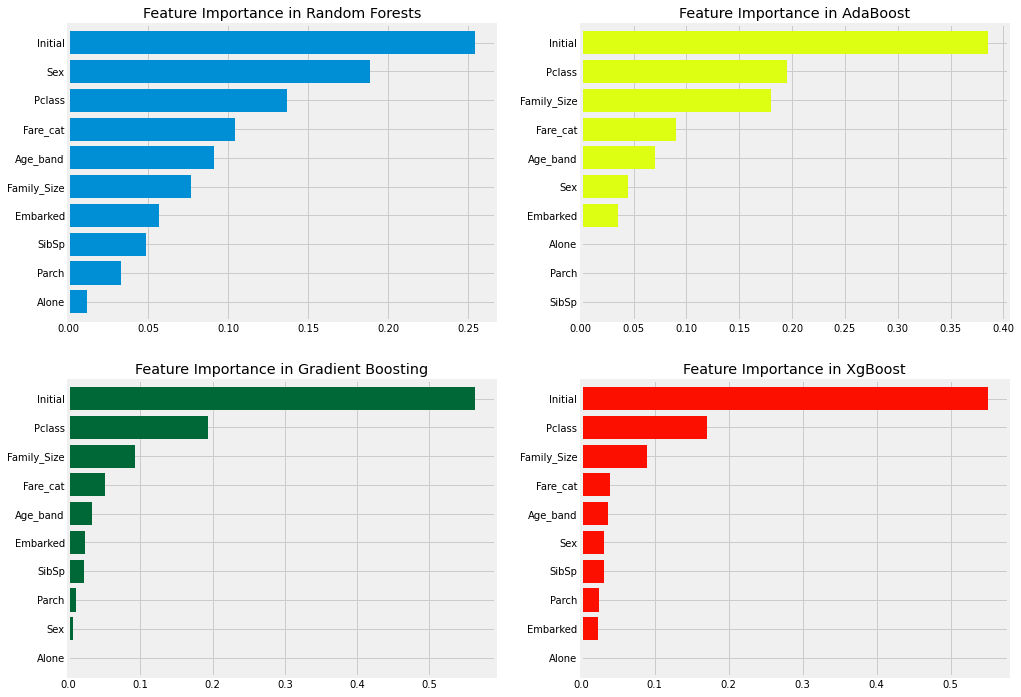

In [77]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

###### 알 수 있는 것
* 공통적으로 높은 중요도를 가진 특징은 Initial, Pclass, Family_Size, Fare_Cat 이다.
* 예상했던 것보다 Sex는 큰 중요도를 가진 특성이 아니다. (Random Forests에서만 중요도가 높다.)